In [1]:
library(ggplot2)
library(reshape2)
library(ggpubr)

Loading required package: magrittr


In [2]:
func_table <- read.table("data/faprotax_func_table.tsv", sep="\t", header=TRUE, comment.char="")
md <- read.table("data/METADATA.txt", sep="\t", header=TRUE, comment.char="", row.names=1)

In [3]:
func_table.m <- func_table[rowSums(func_table[,colnames(func_table)[2:ncol(func_table)]]) >= 0.01,]
func_table.m <- melt(func_table.m)
colnames(func_table.m) <- c("FunctionalGroup", "Sample", "Percentage")
func_table.m$Sample <- gsub("X","", func_table.m$Sample)
func_table.m$Location <- md[match(func_table.m$Sample,rownames(md)), "location"]
levels(func_table.m$Location) <- c("Palmetto Inland", "Palmetto Coast", "Vero Beach")
func_table.m$Sample <- factor(func_table.m$Sample)
levels(func_table.m$Sample) <- c("VB1","VB2","VB3","VB4","PC1","PC2","PC3","PC4","PC5","PI1","PI2","PI3","PI4","PI5","PI6","PC6")
func_table.m$Percentage <- round(func_table.m$Percentage * 100, 2)
func_table.m[func_table.m$Percentage == 0, 'Percentage'] <- NA

Using group as id variables


Warning message:
“Removed 247 rows containing missing values (geom_point).”

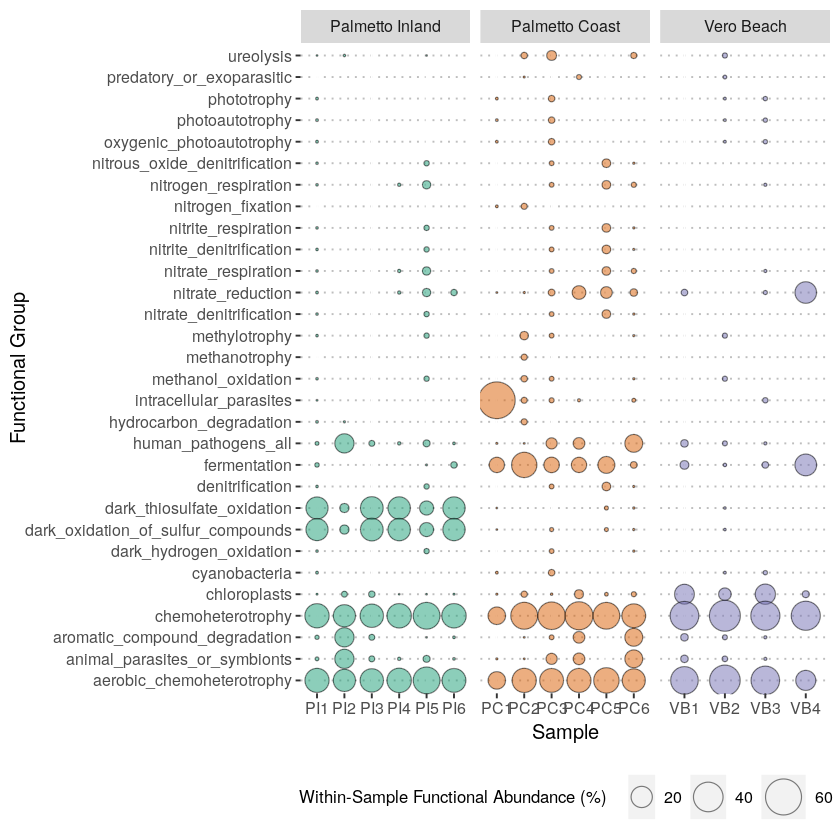

In [4]:
#pdf("FigureS1.pdf", height=8, width=10)
ggplot(func_table.m, aes(x=Sample, y=FunctionalGroup, size=Percentage, fill=Location)) +
    geom_point(shape = 21, alpha = 0.5) +
    facet_grid(.~Location, scales='free_x') +
    theme_pubclean() + 
    scale_fill_brewer(guide='none', palette='Dark2') +
    scale_size_area(max_size = 10, name=element_text("Within-Sample Functional Abundance (%)")) +
    ylab("Functional Group") +
    theme(legend.position='bottom', legend.title = element_text(size=10))
#dev.off()

In [5]:
sessionInfo()

R version 3.4.3 (2017-11-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 17.04

Matrix products: default
BLAS: /usr/lib/libblas/libblas.so.3.7.0
LAPACK: /usr/lib/lapack/liblapack.so.3.7.0

locale:
 [1] LC_CTYPE=en_CA.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_CA.UTF-8        LC_COLLATE=en_CA.UTF-8    
 [5] LC_MONETARY=en_CA.UTF-8    LC_MESSAGES=en_CA.UTF-8   
 [7] LC_PAPER=en_CA.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_CA.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggpubr_0.1.8   magrittr_1.5   reshape2_1.4.3 ggplot2_3.0.0 

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.18         RColorBrewer_1.1-2   compiler_3.4.3      
 [4] pillar_1.3.0         plyr_1.8.4           bindr_0.1.1         
 [7] base64enc_0.1-3      tools_3.4.3          digest_0.6.15   